#  $\color{blue}{\huge\bf\mathcal{Clase\ Despliegues \ -\ Python:}}$



##  Plataformas en la nube (más comunes y sencillas)

Estas plataformas son ideales para desplegar proyectos académicos o personales rápidamonto:

| Plataforma       | URL                             | Ventajas                                          | Desventajas                                    |
|------------------|---------------------------------|---------------------------------------------------|-------------------------------------------------|
| **Render**       | [render.com](https://render.com)| - Fácil integración con GitHub<br>- Plan gratuito | Límites en memoria y CPU en planes gratuitos   |
| **Railway**      | [railway.app](https://railway.app)| - Sencillo despliegue desde GitHub<br>- Plan gratuito disponible | Límites en recursos gratuitos                  |
| **PythonAnywhere**| [pythonanywhere.com](https://www.pythonanywhere.com/)| - Especializado en Python<br>- Fácil configuración| Restricciones en plan gratuito                 |

---

##  Servicios avanzados (para proyectos profesionales o grandes)

Si tu aplicación es más robusta y requiere mayor escalabilidad, estas opciones son recomendables:

| Plataforma               | URL                                                             | Ventajas                                                        | Desventajas                                 |
|--------------------------|-----------------------------------------------------------------|-----------------------------------------------------------------|----------------------------------------------|
| **Heroku**               | [heroku.com](https://www.heroku.com/)                           | - Escalabilidad sencilla<br>- Integración GitHub                | Sin plan gratuito permanente actualmente     |
| **AWS Elastic Beanstalk**| [aws.amazon.com/elasticbeanstalk](https://aws.amazon.com/elasticbeanstalk)| - Alta escalabilidad<br>- Personalización avanzada              | Mayor complejidad de configuración inicial   |
| **Google Cloud App Engine**| [cloud.google.com/appengine](https://cloud.google.com/appengine/) | - Escalabilidad automática<br>- Integración con servicios Google| Configuración algo compleja para principiantes|
| **Azure App Service**    | [azure.microsoft.com](https://azure.microsoft.com/services/app-service/)| - Potente y escalable<br>- Alta integración con Azure           | Curva de aprendizaje elevada inicialmente    |

---

##  Despliegue en servidores propios o VPS (control total)

Estas plataformas brindan control completo sobre el servidor, ideales si prefieres gestionar todos los detalles técnicos:

| Plataforma        | URL                                     | Ventajas                                       | Desventajas                                   |
|-------------------|-----------------------------------------|------------------------------------------------|-----------------------------------------------|
| **DigitalOcean**  | [digitalocean.com](https://digitalocean.com)| - Control total<br>- Excelente documentación<br>- Costos reducidos| Requiere conocimientos en administración de servidores Linux |
| **Linode**        | [linode.com](https://linode.com)        | - Alternativa económica<br>- Documentación clara| Requiere conocimientos técnicos avanzados     |

---

##  Recomendación:

| Caso de uso                                | Plataformas recomendadas                      |
|--------------------------------------------|-----------------------------------------------|
| **Proyectos académicos o educativos rápidos**|  Render,  Railway,  PythonAnywhere        |
| **Proyectos profesionales con mayor escala** |  AWS,  Google Cloud,  Azure              |
| **Control completo de infraestructura**     |  DigitalOcean,  Linode                     |

---


| Plataforma                    | Sitio Oficial                                             | Ventajas principales                                        | Desventajas principales                                 |
|-------------------------------|-----------------------------------------------------------|-------------------------------------------------------------|---------------------------------------------------------|
| **Render**                    | [render.com](https://render.com)                          | Gratuito inicial, fácil integración GitHub                  | Límites de recursos gratuitos                           |
| **Heroku**                    | [heroku.com](https://www.heroku.com)                      | Sencillo, integración directa GitHub                        | Aplicaciones gratuitas duermen cuando están inactivas   |
| **PythonAnywhere**            | [pythonanywhere.com](https://www.pythonanywhere.com)      | Ideal para Python, gratuito básico                          | Restricciones en recursos y librerías gratuitas         |
| **AWS Elastic Beanstalk**     | [aws.amazon.com](https://aws.amazon.com/es/elasticbeanstalk)| Muy escalable, integración servicios AWS                    | Complejidad inicial alta, costos variables              |
| **Google Cloud App Engine**   | [cloud.google.com](https://cloud.google.com/appengine)    | Escalabilidad automática, integración Google Cloud          | Complejidad técnica, costos variables                   |
| **Azure App Services**        | [azure.microsoft.com](https://azure.microsoft.com)        | Integración con ecosistema Microsoft, escalable             | Complejo para principiantes                             |
| **DigitalOcean App Platform** | [digitalocean.com](https://www.digitalocean.com/app-platform)| Fácil uso, precios competitivos                             | Sin plan gratuito indefinido                            |


#  $\color{orange}{\huge\bf\mathcal{Render}}$

Render es una plataforma moderna y sencilla que permite alojar (desplegar) aplicaciones web, APIs, bases de datos y sitios estáticos en la nube. Es conocida por ser amigable, rápida de configurar y gratuita para proyectos sencillos o educativos.

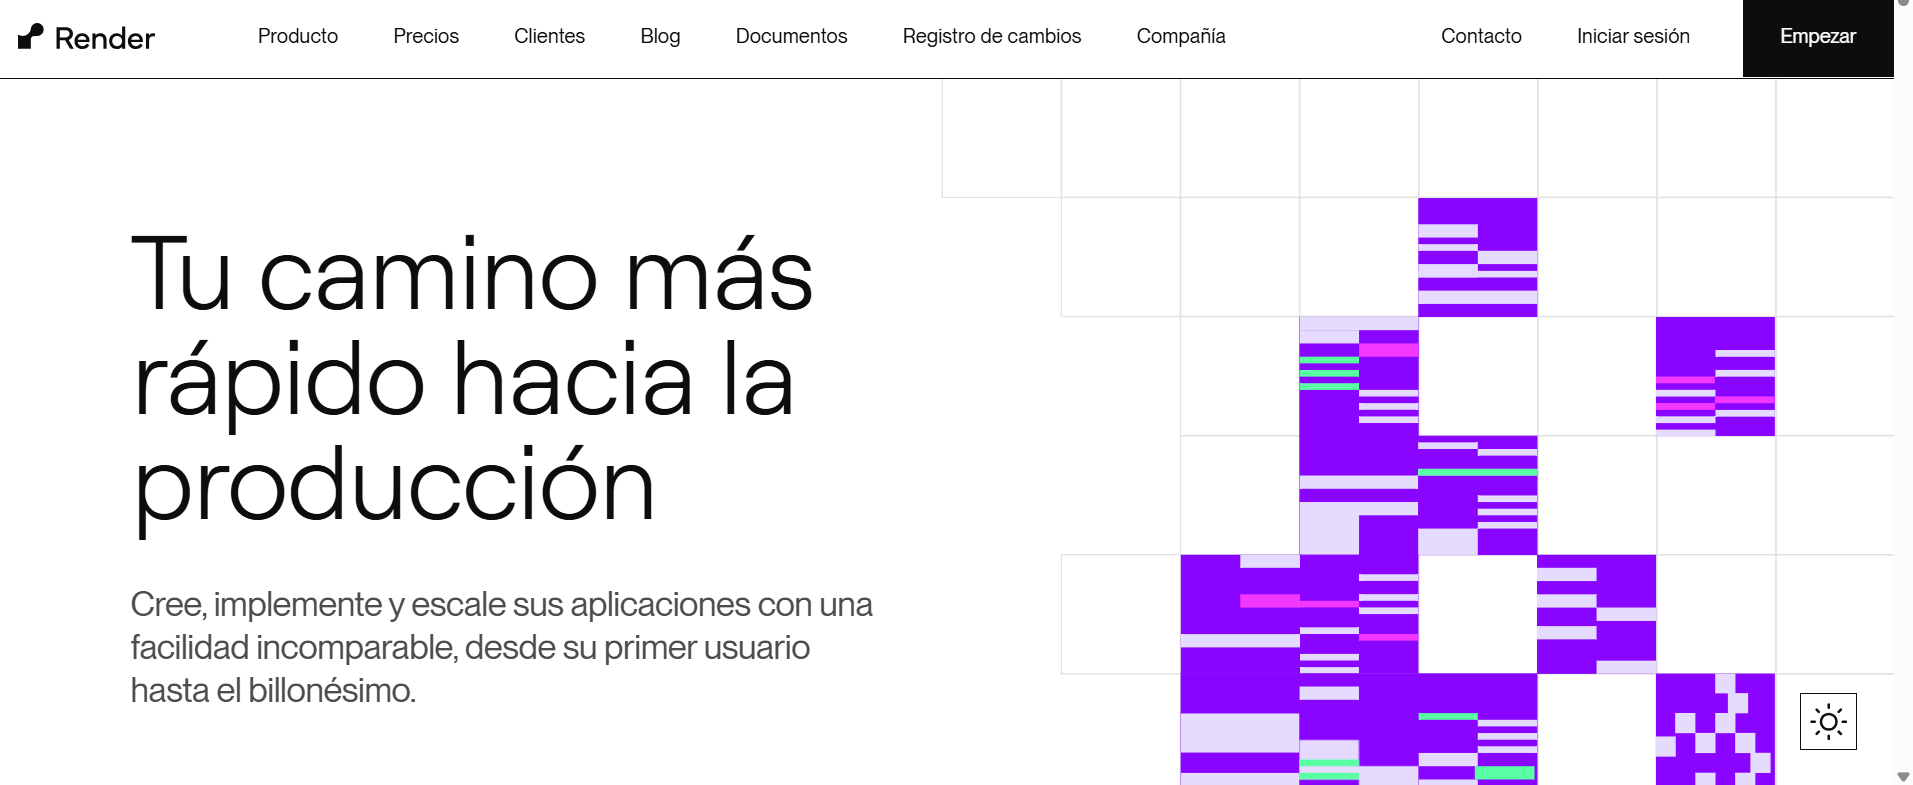

## **Pasos para desplegar en Render**

# Pasos para desplegar una aplicación Dash en Render desde cero  

## **1. Preparar la aplicación Dash localmente**

Crea una aplicación básica llamada `app.py`. Asegúrate de tener esta estructura básica:



In [ ]:
import dash
from dash import html

app = dash.Dash(__name__)
server = app.server  

app.layout = html.Div("¡Hola desde Dash en Render!")

if __name__ == "__main__":
    app.run_server(debug=True)

### **Toma este de ejemplo**

**Copia en un archivo .py y guardalo como app.py**

In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

df = px.data.gapminder().query("year == 2007")

app = dash.Dash(__name__)
server = app.server  


app.layout = html.Div([
    html.H1("Población por Continente (2007)", style={'textAlign': 'center'}),
    
    
    dcc.Dropdown(
        id='dropdown-continent',
        options=[{'label': cont, 'value': cont} for cont in df['continent'].unique()],
        value='Asia',
        clearable=False
    ),
    
    
    dcc.Graph(id='grafico-poblacion')
])


@app.callback(
    dash.dependencies.Output('grafico-poblacion', 'figure'),
    [dash.dependencies.Input('dropdown-continent', 'value')]
)
def actualizar_grafico(continente):
    filtro = df[df['continent'] == continente]
    fig = px.bar(filtro, x='country', y='pop', title=f'Población en {continente}')
    return fig


if __name__ == '__main__':
    app.run(debug=True)


### **2. Crear archivo de requerimientos**

Para que Render sepa qué librerías debe instalar, necesitas generar un archivo llamado `requirements.txt` desde tu entorno virtual.

Puedes hacerlo de dos formas:

###  Opción 1: Automáticamente con pip freeze (más completa)

`pip freeze > requirements.txt`



### Opción 2: Si prefieres que usen solo la forma manual  
Puedes generarlo escribiendo estos comandos en la terminal:

`echo dash > requirements.txt`

`echo pandas >> requirements.txt`

`echo plotly >> requirements.txt`

`echo gunicorn >> requirements.txt`


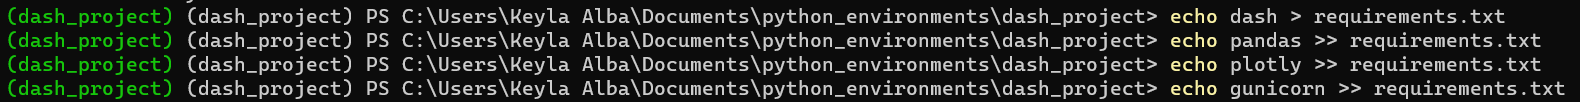

### **3. (Opción: 1) Crear archivo `Procfile`**

En algunos entornos como **Heroku**, es obligatorio crear un archivo llamado `Procfile` (sin extensión), que le indica al servidor cómo ejecutar tu aplicación web.

El contenido debe ser exactamente este:

`web: gunicorn app:server`


###  **(Opción: 2) ¿Qué debe tener tu Dash para evitar usar `Procfile` en Render?**

Para que **Render despliegue tu aplicación Dash sin necesidad de crear un archivo `Procfile`**, debes asegurarte de cumplir con estas tres condiciones clave:

####  1. El archivo principal debe llamarse `app.py`

Render, por defecto, busca un archivo llamado `app.py` como punto de entrada de la aplicación.

####  2. Debes incluir esta línea en tu código:


`server = app.server`


###  **4. Subir el proyecto a GitHub**

- Crea un nuevo repositorio en [GitHub](https://github.com/).
- Inicializa el repositorio local y sube todos tus archivos: `app.py` y `requeriments.txt`

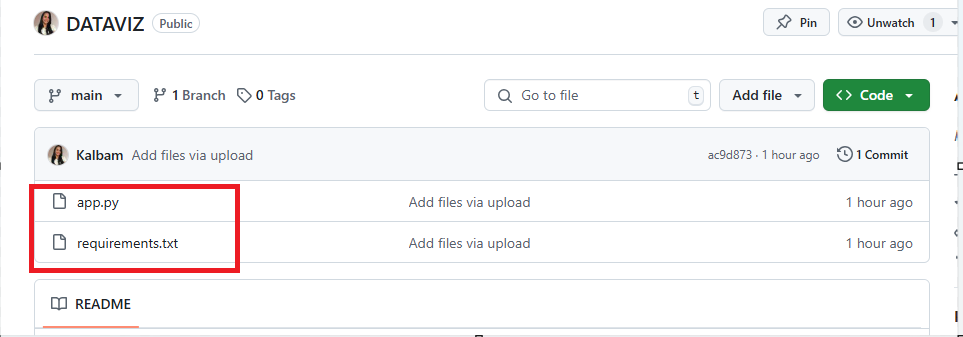

###  **5. Configurar y desplegar en Render**

1. Entra en [Render.com](https://render.com/) y crea una cuenta o inicia sesión.

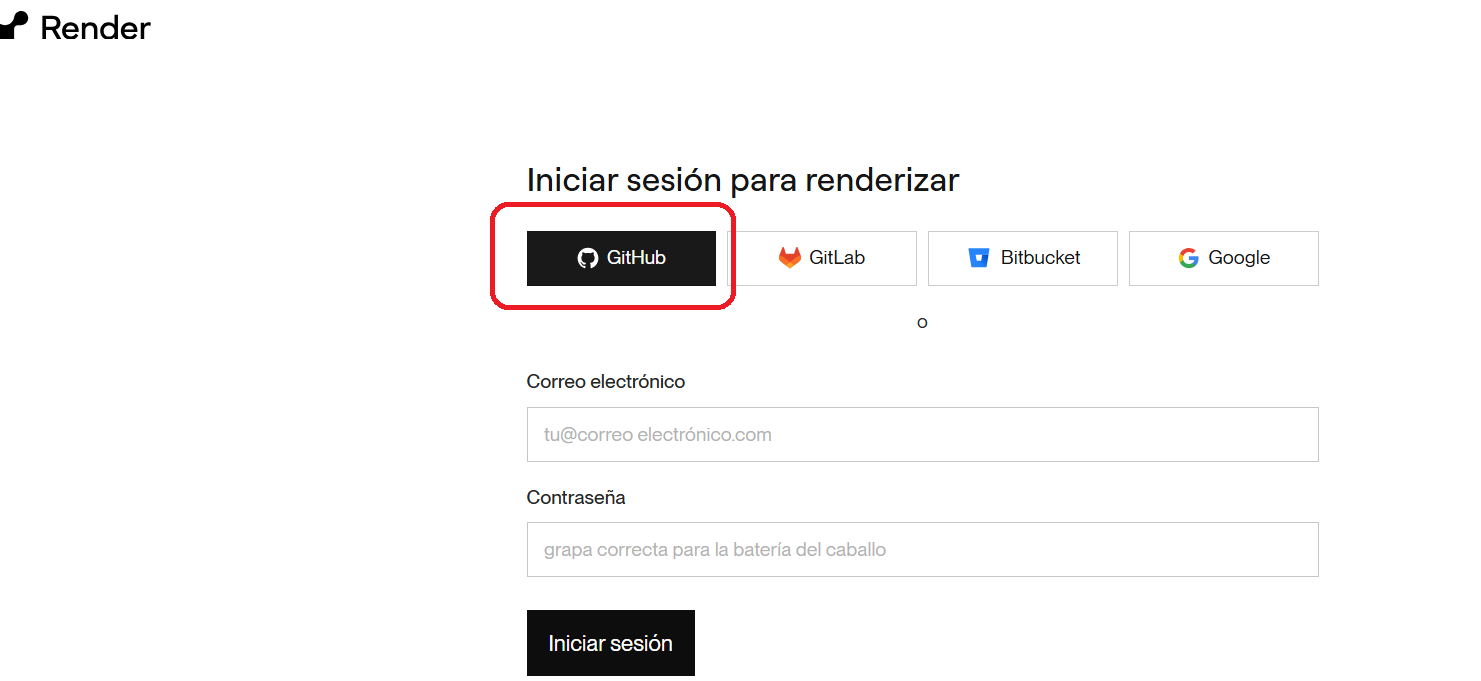

**Entra con tu cuenta de github**

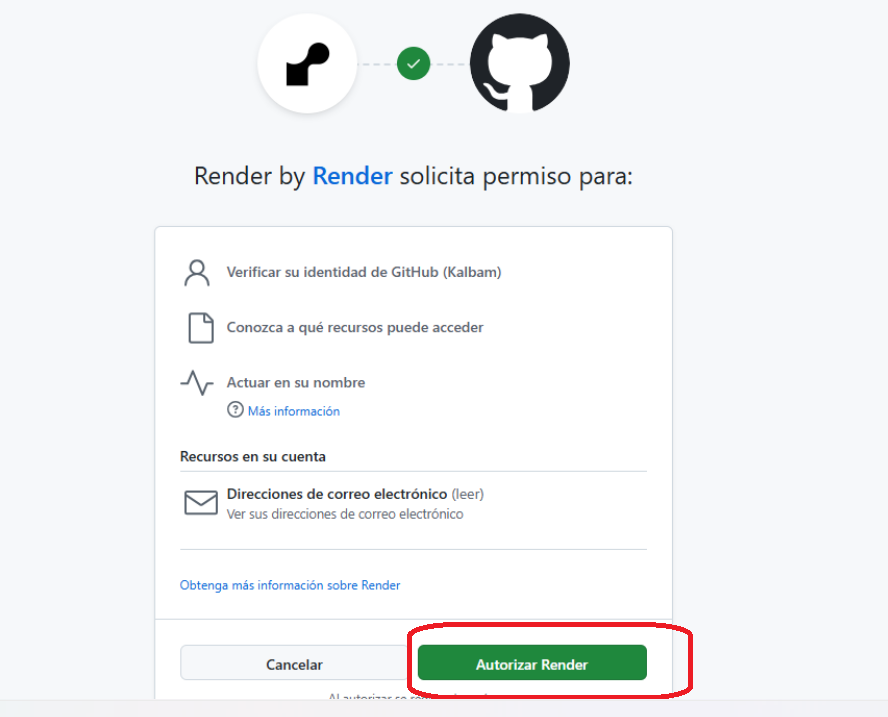

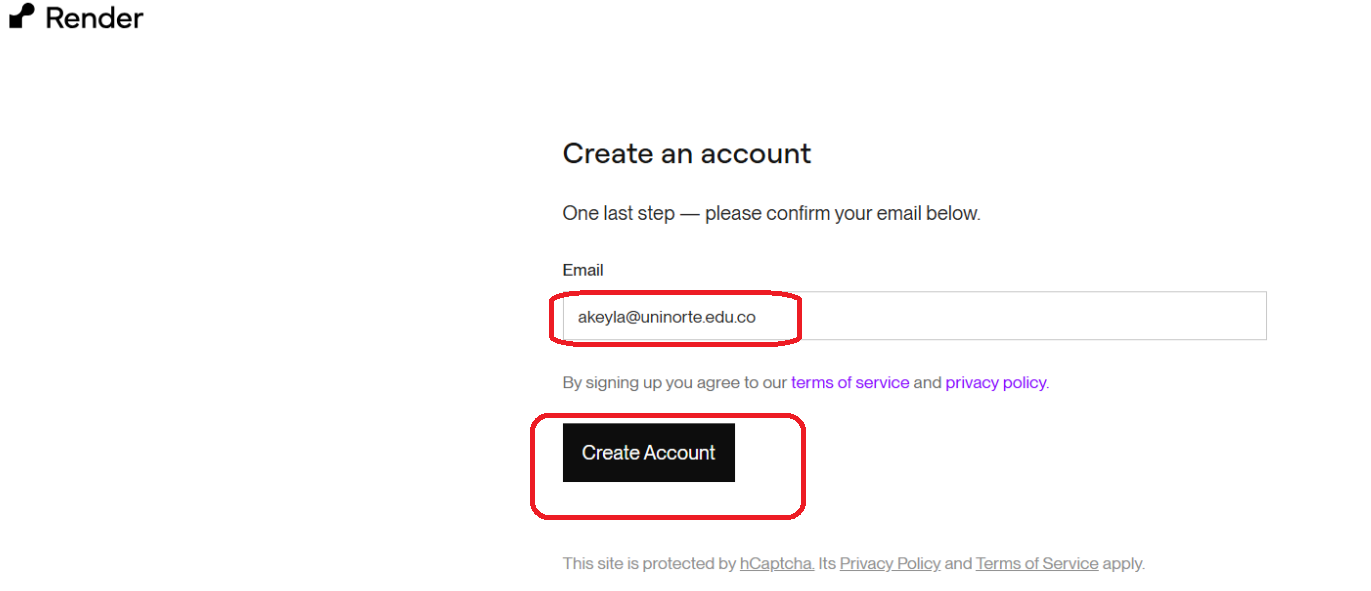

**Al correo te va a llegar un correo de verificación**

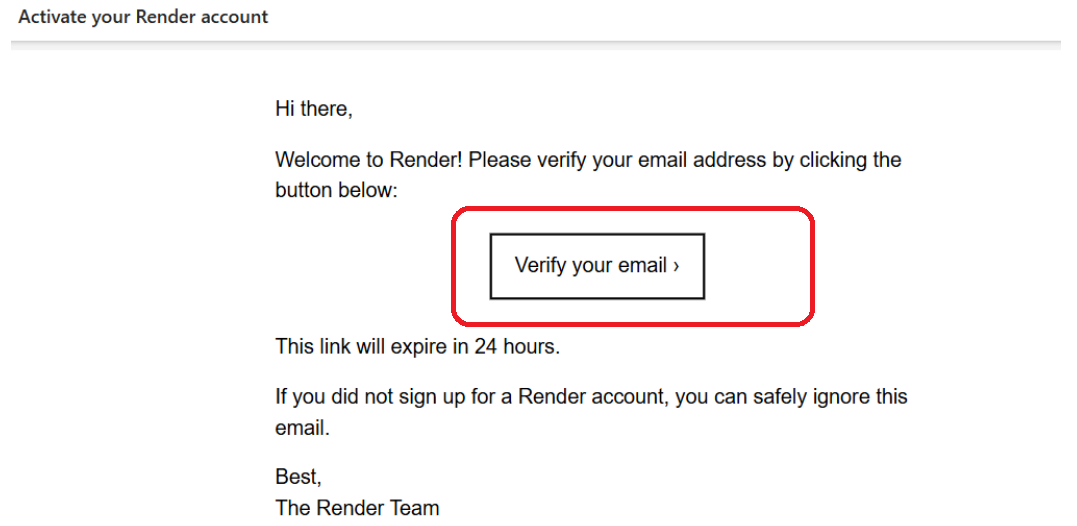

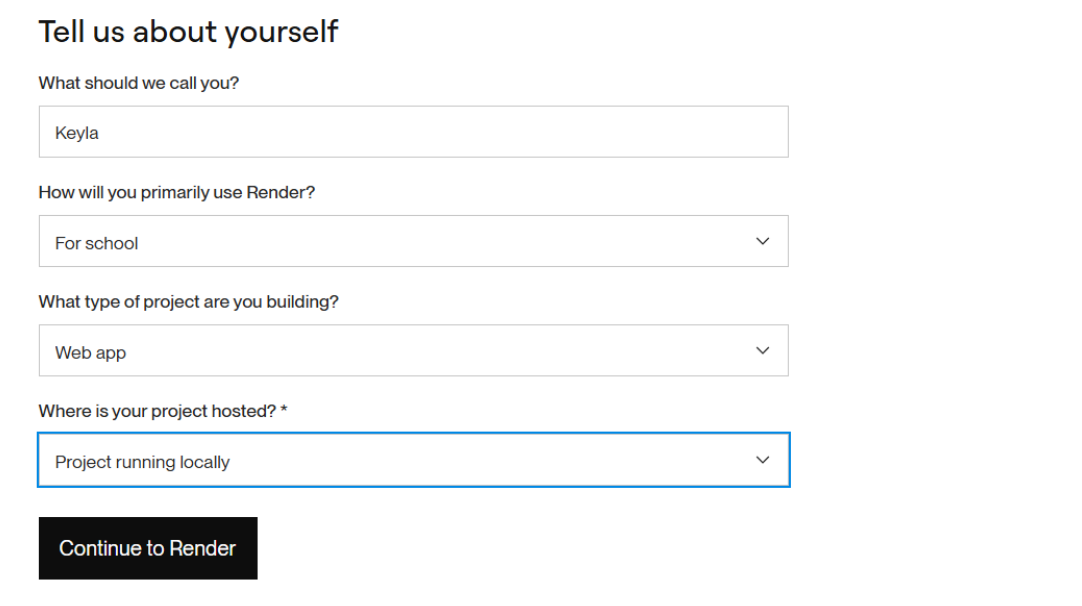

2. Selecciona la opción **New → Web Service**.

3. Conecta tu cuenta de GitHub y selecciona el repositorio que creaste.

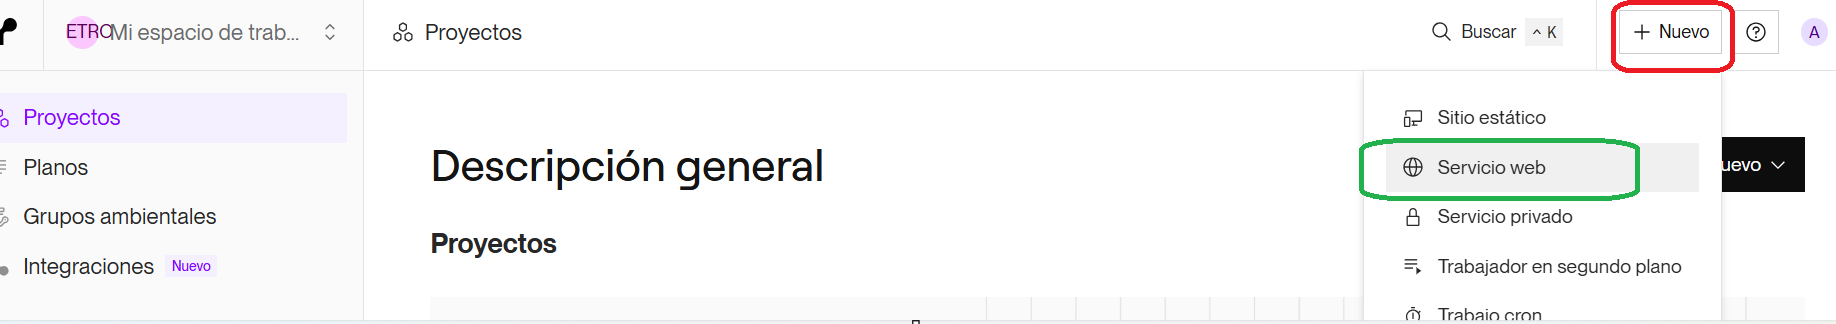

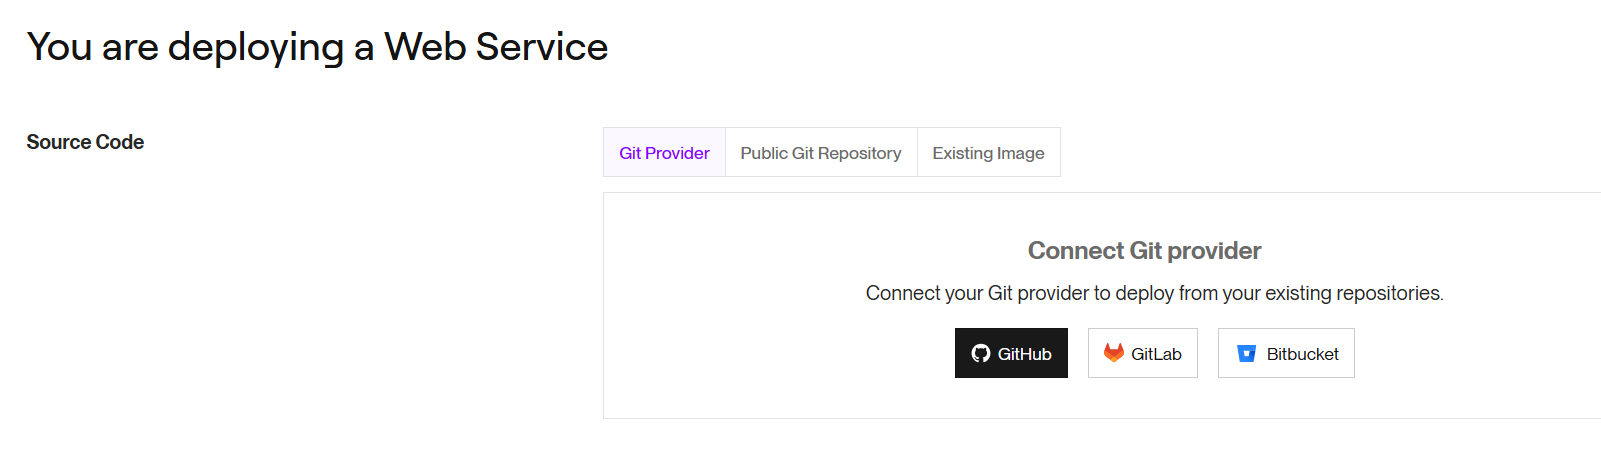

**Escoge el repositorio que creaste**

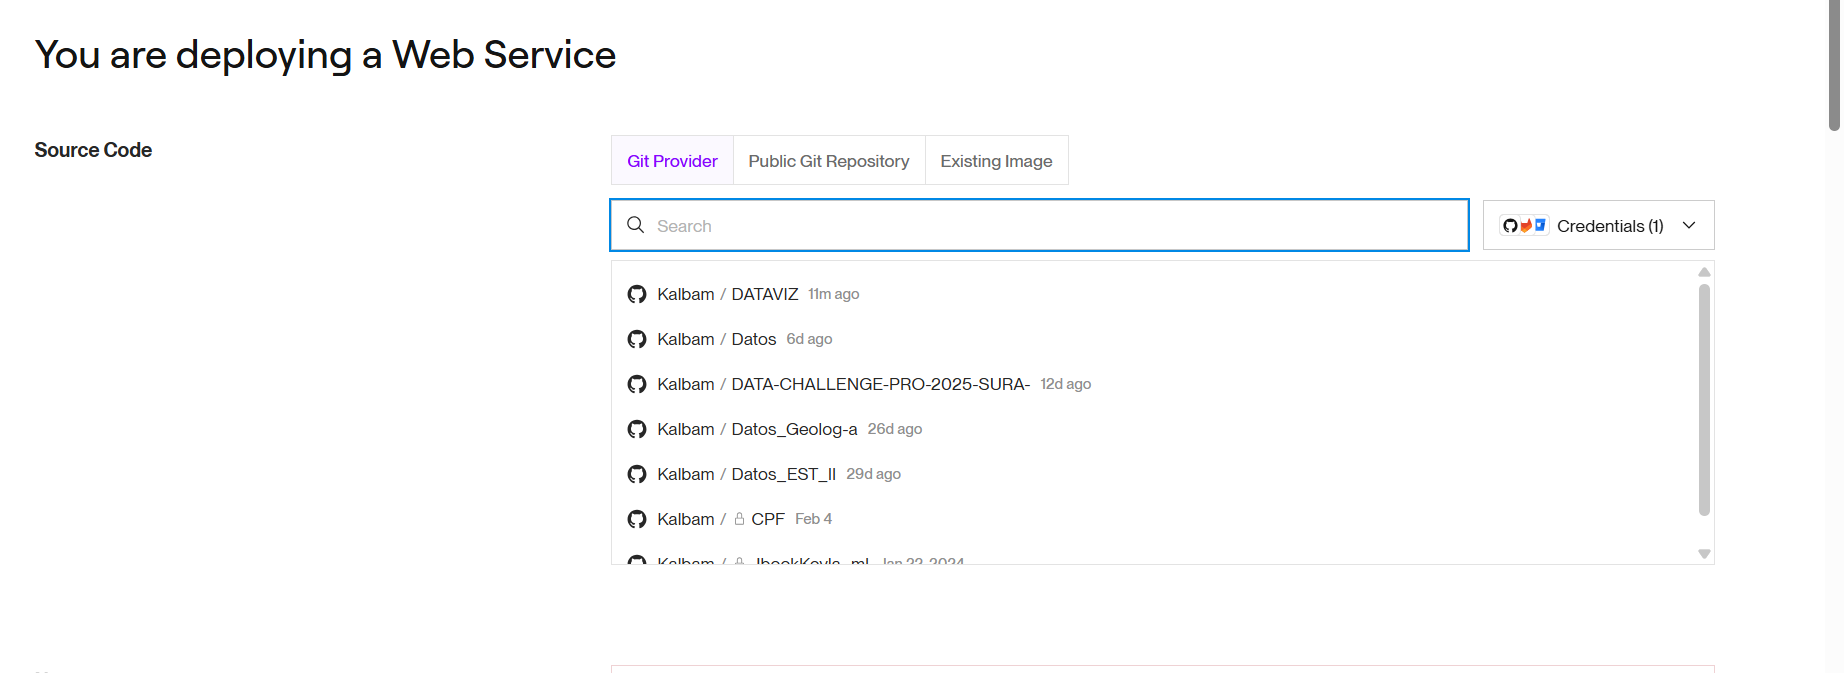

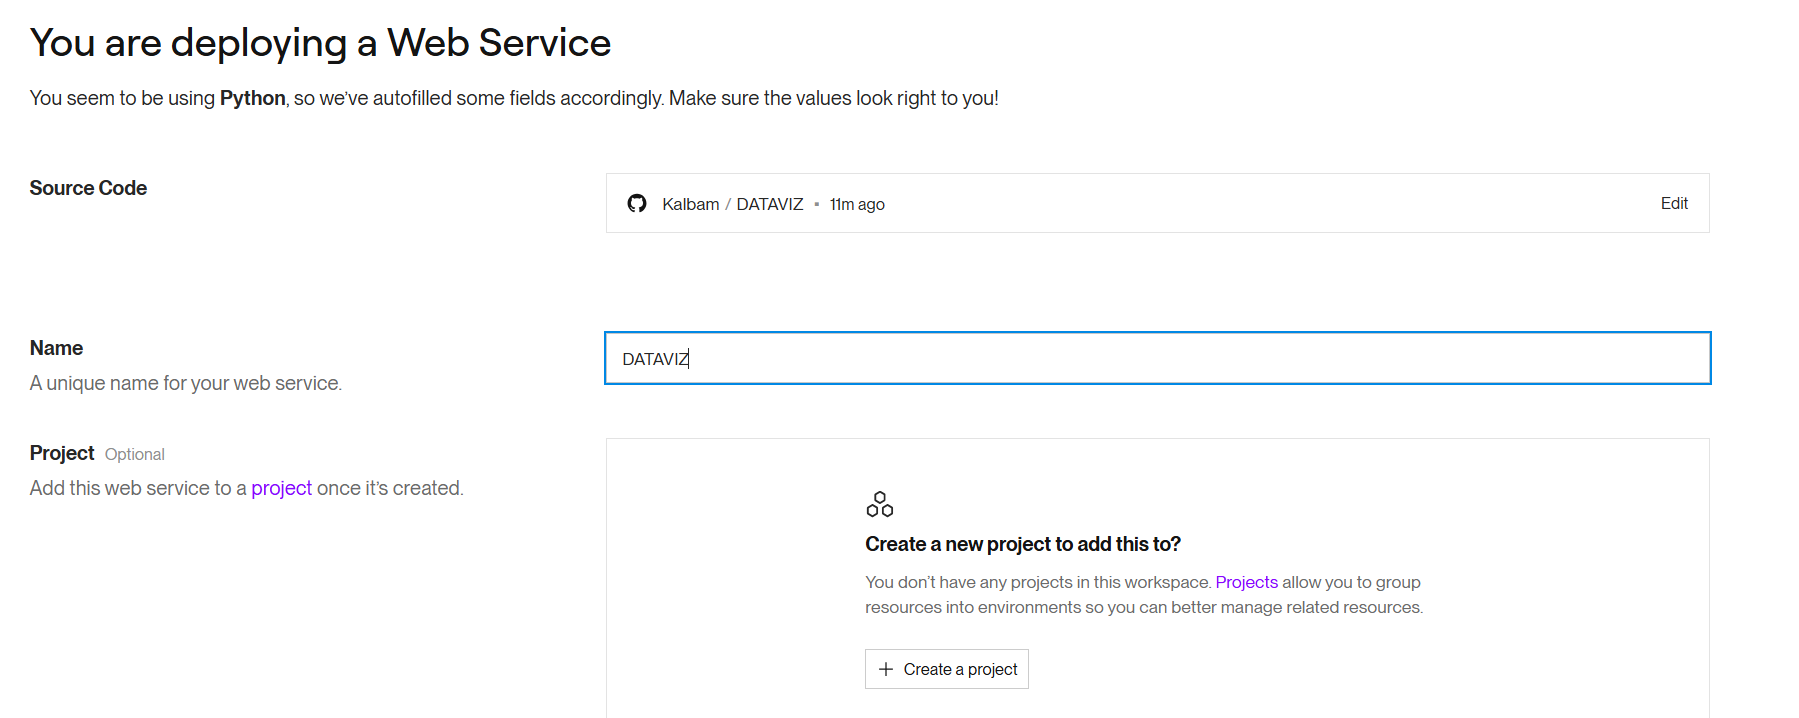

###  4. Configura el servicio

Completa los siguientes campos:

| Campo                | Valor                                 |
|----------------------|----------------------------------------|
| **Name**             | El nombre que desees para tu app       |
| **Branch**           | `main`                                 |
| **Build Command**    | `pip install -r requirements.txt`      |
| **Start Command**    | `gunicorn app:server`                  |
| **Environment**      | Python                                 |
| **Instance Type**    | Free   

**Finalmente selecciona Deploy web service**

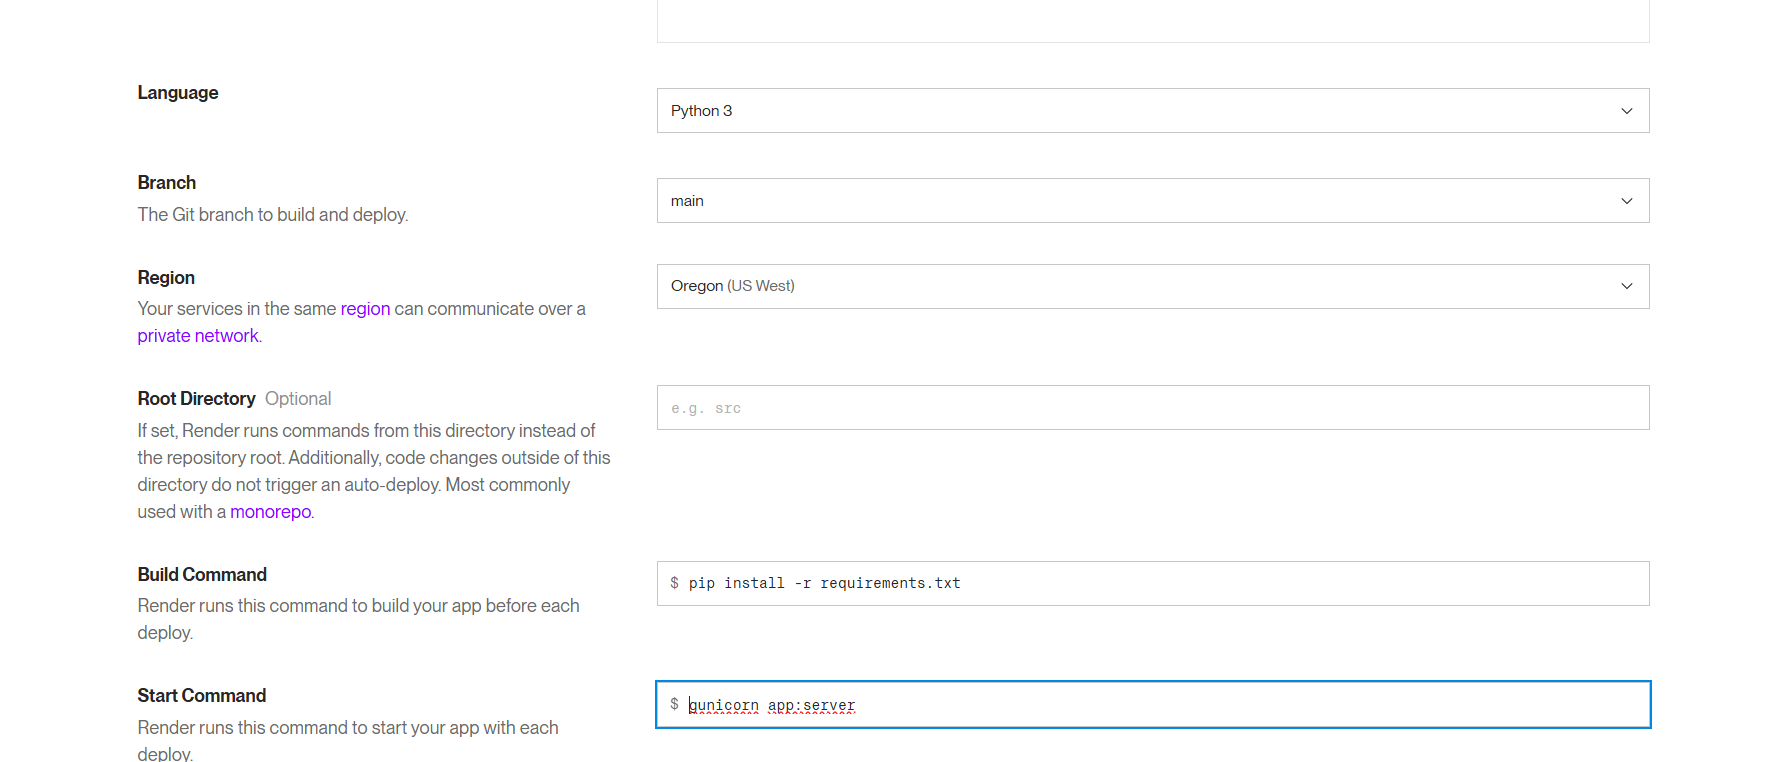

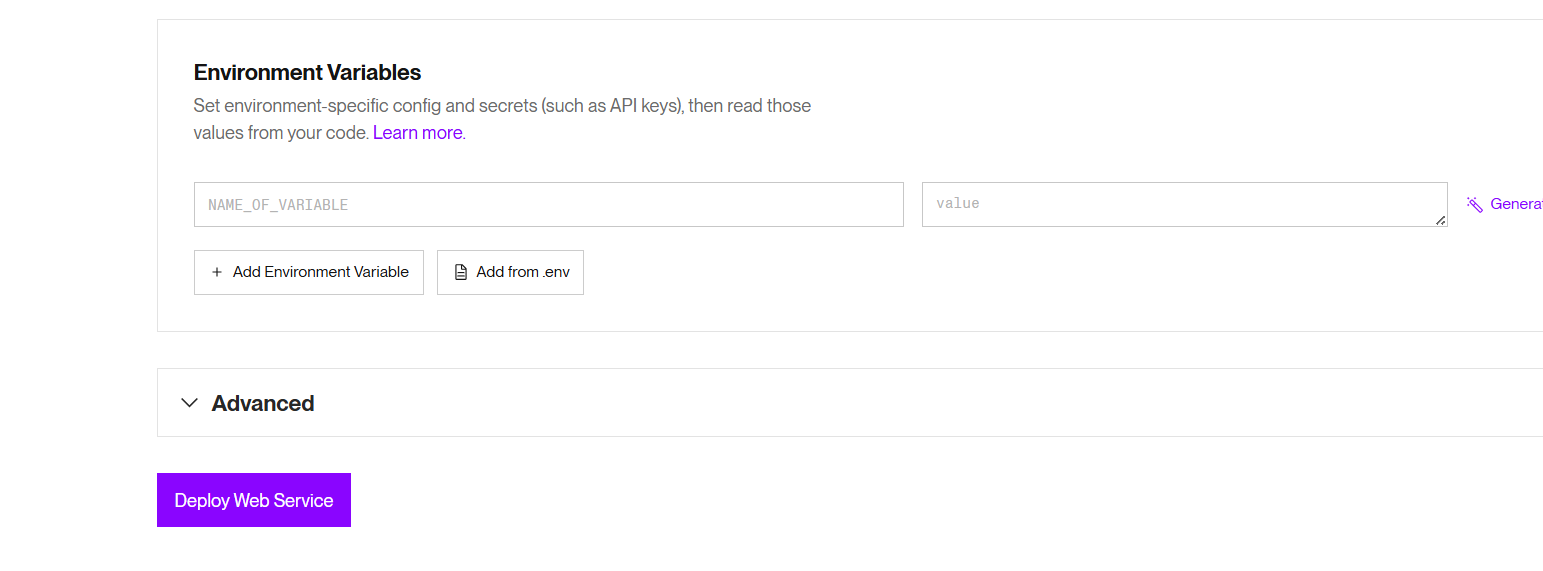

###  5. Espera el estado **"Live"**

Cuando Render muestre el estado **"Live "**, tu aplicación estará publicada.  
Podrás acceder a ella en un enlace como:

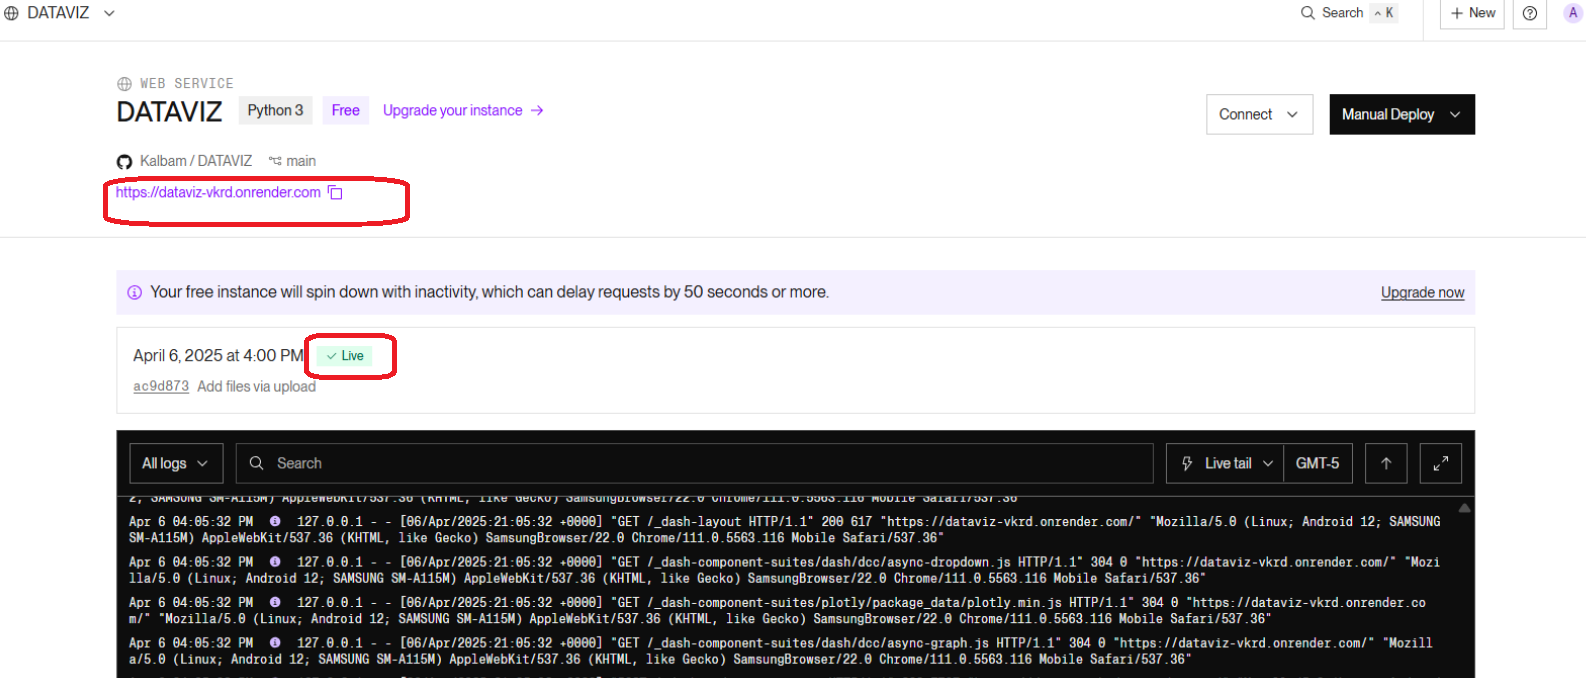

https://dataviz-vkrd.onrender.com/ 

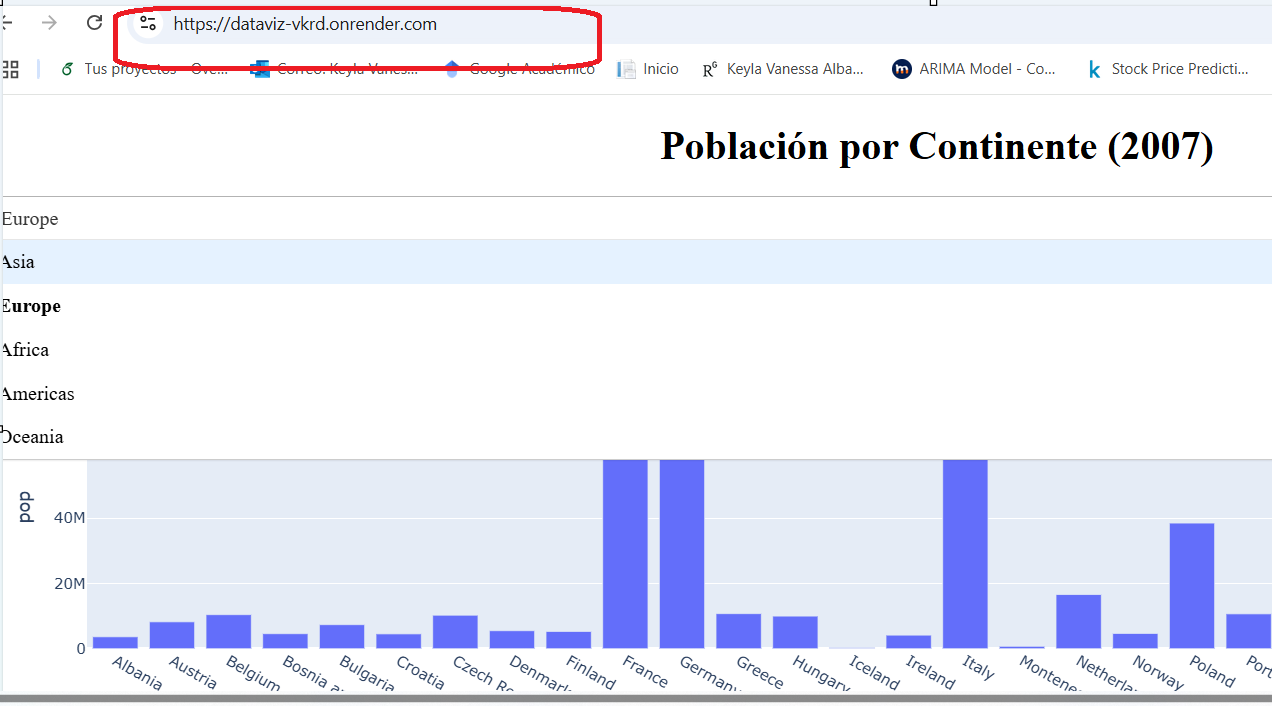

**Finalmente este enlace se puede compartir a otras personas y así se podra visualizar**

## Restricciones del Plan Gratuito de Render

El plan gratuito de Render, conocido como **"Hobby"**, permite desplegar aplicaciones como Dash, Flask o FastAPI de forma sencilla y sin costo, lo que lo hace ideal para proyectos personales, educativos o de prueba. Sin embargo, presenta algunas restricciones importantes:

- Si la aplicación no recibe visitas durante **15 minutos**, entra en modo de reposo (*sleep mode*), lo que puede generar una demora de entre **30 y 50 segundos** en reactivarse cuando un usuario vuelve a ingresar.
- El plan gratuito ofrece **recursos limitados**, con un máximo de **2 CPUs y hasta 1 GB de RAM**, lo cual es suficiente para aplicaciones ligeras, pero no para tareas intensivas o de alto tráfico.
- Solo se permite **1 proyecto con hasta 2 entornos** (por ejemplo, producción y pruebas), y no se pueden tener múltiples aplicaciones activas al mismo tiempo sin pasar a un plan de pago.
- Cuenta con un límite de **100 GB de transferencia de datos al mes**, generalmente suficiente para fines educativos.
- Las actualizaciones del proyecto se hacen exclusivamente a través de **GitHub**, ya que Render **no permite subir archivos directamente desde el computador**.
- Los **registros de actividad (logs)** solo se almacenan durante **7 días**.
- El sistema **no ofrece autenticación nativa** para proteger la aplicación con contraseñas, aunque esto puede ser programado por el desarrollador.

Render es una excelente opción gratuita para desplegar aplicaciones web sencillas, con algunas limitaciones técnicas y operativas que pueden superarse fácilmente si se requiere más capacidad, optando por uno de sus planes pagos.
